# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [3]:
# Import necessary packages
# Standard library imports
import json
import os
import sys

# Data manipulation and numerical computing
import numpy as np
import pandas as pd

# Machine learning - scikit-learn
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report

# Model optimization
import optuna
from optuna.logging import set_verbosity

# Model persistence
import joblib

# Add parent directory to path to import weather module
sys.path.append('../../')

# Import weather module with all utilities
import weather
from weather.plots import set_plot_style

# Set consistent plot styling
set_plot_style()

---
## A. Project Description


In [4]:
# <Student to fill this section>
student_name = "Zhiyuan Zhao"
student_id = "25605217"

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## B. Business Understanding

In [7]:
# <Student to fill this section>
business_use_case_description = """
Weather prediction model for Sydney that forecasts rain occurrence seven days ahead. Enables proactive planning 
for weather-sensitive activities, resource allocation, and risk management across various sectors including 
construction, events, agriculture, and emergency services.
"""

In [8]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [9]:
# <Student to fill this section>
business_objectives = """
Accurate predictions enable better planning and resource allocation, potentially saving costs and reducing disruptions. 
False positives lead to unnecessary preparations while false negatives risk inadequate preparation for rain events. 
Both errors have economic and safety implications requiring balanced model performance.
"""

In [10]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [11]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
Event organizers use predictions for scheduling outdoor activities. Construction companies plan weather-sensitive operations. 
Farmers optimize irrigation and harvesting schedules. Emergency services allocate resources for flood preparedness. 
General public makes informed decisions about outdoor plans and commuting arrangements.
"""

In [12]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [13]:
# Load the raw weather data
data_path = '../../data/raw/sydney_weather_daily.csv'
df = pd.read_csv(data_path)

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Date range: from {df['time'].min()} to {df['time'].max()}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset shape: (31046, 21)
Date range: from 1940-01-02 to 2024-12-31

Column names:
['time', 'weather_code', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean', 'sunrise', 'sunset', 'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours', 'sunshine_duration', 'daylight_duration', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration']

First 5 rows:


,time,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,rain_sum,snowfall_sum,precipitation_hours,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,1940-01-02,51,22.2,17.4,19.6,21.9,16.2,19.2,1940-01-02T04:48,1940-01-02T19:09,...,2.1,0.0,11.0,45748.11,51663.50,17.7,43.9,153,20.18,4.02
1,1940-01-03,51,25.1,16.4,20.8,25.8,17.5,21.5,1940-01-03T04:49,1940-01-03T19:09,...,1.1,0.0,6.0,48408.09,51627.63,19.7,42.1,61,24.04,4.69
2,1940-01-04,3,28.5,16.6,22.6,29.7,17.8,23.4,1940-01-04T04:49,1940-01-04T19:09,...,0.0,0.0,0.0,48245.77,51589.00,18.4,38.9,44,27.77,5.87
3,1940-01-05,55,22.1,19.3,21.0,23.1,20.3,21.9,1940-01-05T04:50,1940-01-05T19:09,...,9.7,0.0,13.0,9645.05,51547.63,17.3,42.8,12,9.98,2.31
4,1940-01-06,53,29.2,19.3,23.5,32.1,19.6,24.7,1940-01-06T04:51,1940-01-06T19:09,...,3.5,0.0,12.0,36146.81,51503.58,16.6,35.6,86,18.12,4.38


### C.2 Define Target variable

In [14]:
# Define target variable
target_name = 'rain_on_day_7'

In [15]:
# <Student to fill this section>
target_definition_explanations = """
Binary target variable indicating rain occurrence exactly seven days ahead. Rain defined as precipitation exceeding 
zero millimeters. Seven-day forecast horizon balances predictability with practical planning needs for medium-range 
weather-dependent decisions and operational scheduling requirements.
"""

In [16]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [17]:
# Create binary target variable using weather module function
df['rain_on_day_7'] = weather.create_rain_on_day_7_target(df)
target_name = 'rain_on_day_7'

# Check creation results
print(f"Target variable '{target_name}' created successfully")
print(f"Total rows: {len(df)}")
print(f"Rows with valid target: {df[target_name].notna().sum()}")
print(f"Rows with NaN target (last 7 days): {df[target_name].isna().sum()}")

# Remove rows with missing target values (last 7 days)
df_clean = df.dropna(subset=[target_name])

print(f"\nAfter removing last 7 days:")
print(f"Dataset size: {len(df_clean)}")
print(f"Time range: {df_clean['time'].min()} to {df_clean['time'].max()}")

# Save the cleaned data with target variable to interim folder
interim_path = '../../data/interim/'
os.makedirs(interim_path, exist_ok=True)

# Save only the cleaned data (without last 7 days)
output_file = os.path.join(interim_path, 'sydney_weather_with_rain_on_day_7_target.csv')
df_clean.to_csv(output_file, index=False)
print(f"\nCleaned data with target variable saved to: {output_file}")

# Update df to use the cleaned version
df = df_clean.copy()

Target variable 'rain_on_day_7' created successfully
Total rows: 31046
Rows with valid target: 31039
Rows with NaN target (last 7 days): 7

After removing last 7 days:
Dataset size: 31039
Time range: 1940-01-02 to 2024-12-24

Cleaned data with target variable saved to: ../../data/interim/sydney_weather_with_rain_on_day_7_target.csv


### C.4 Explore Target variable

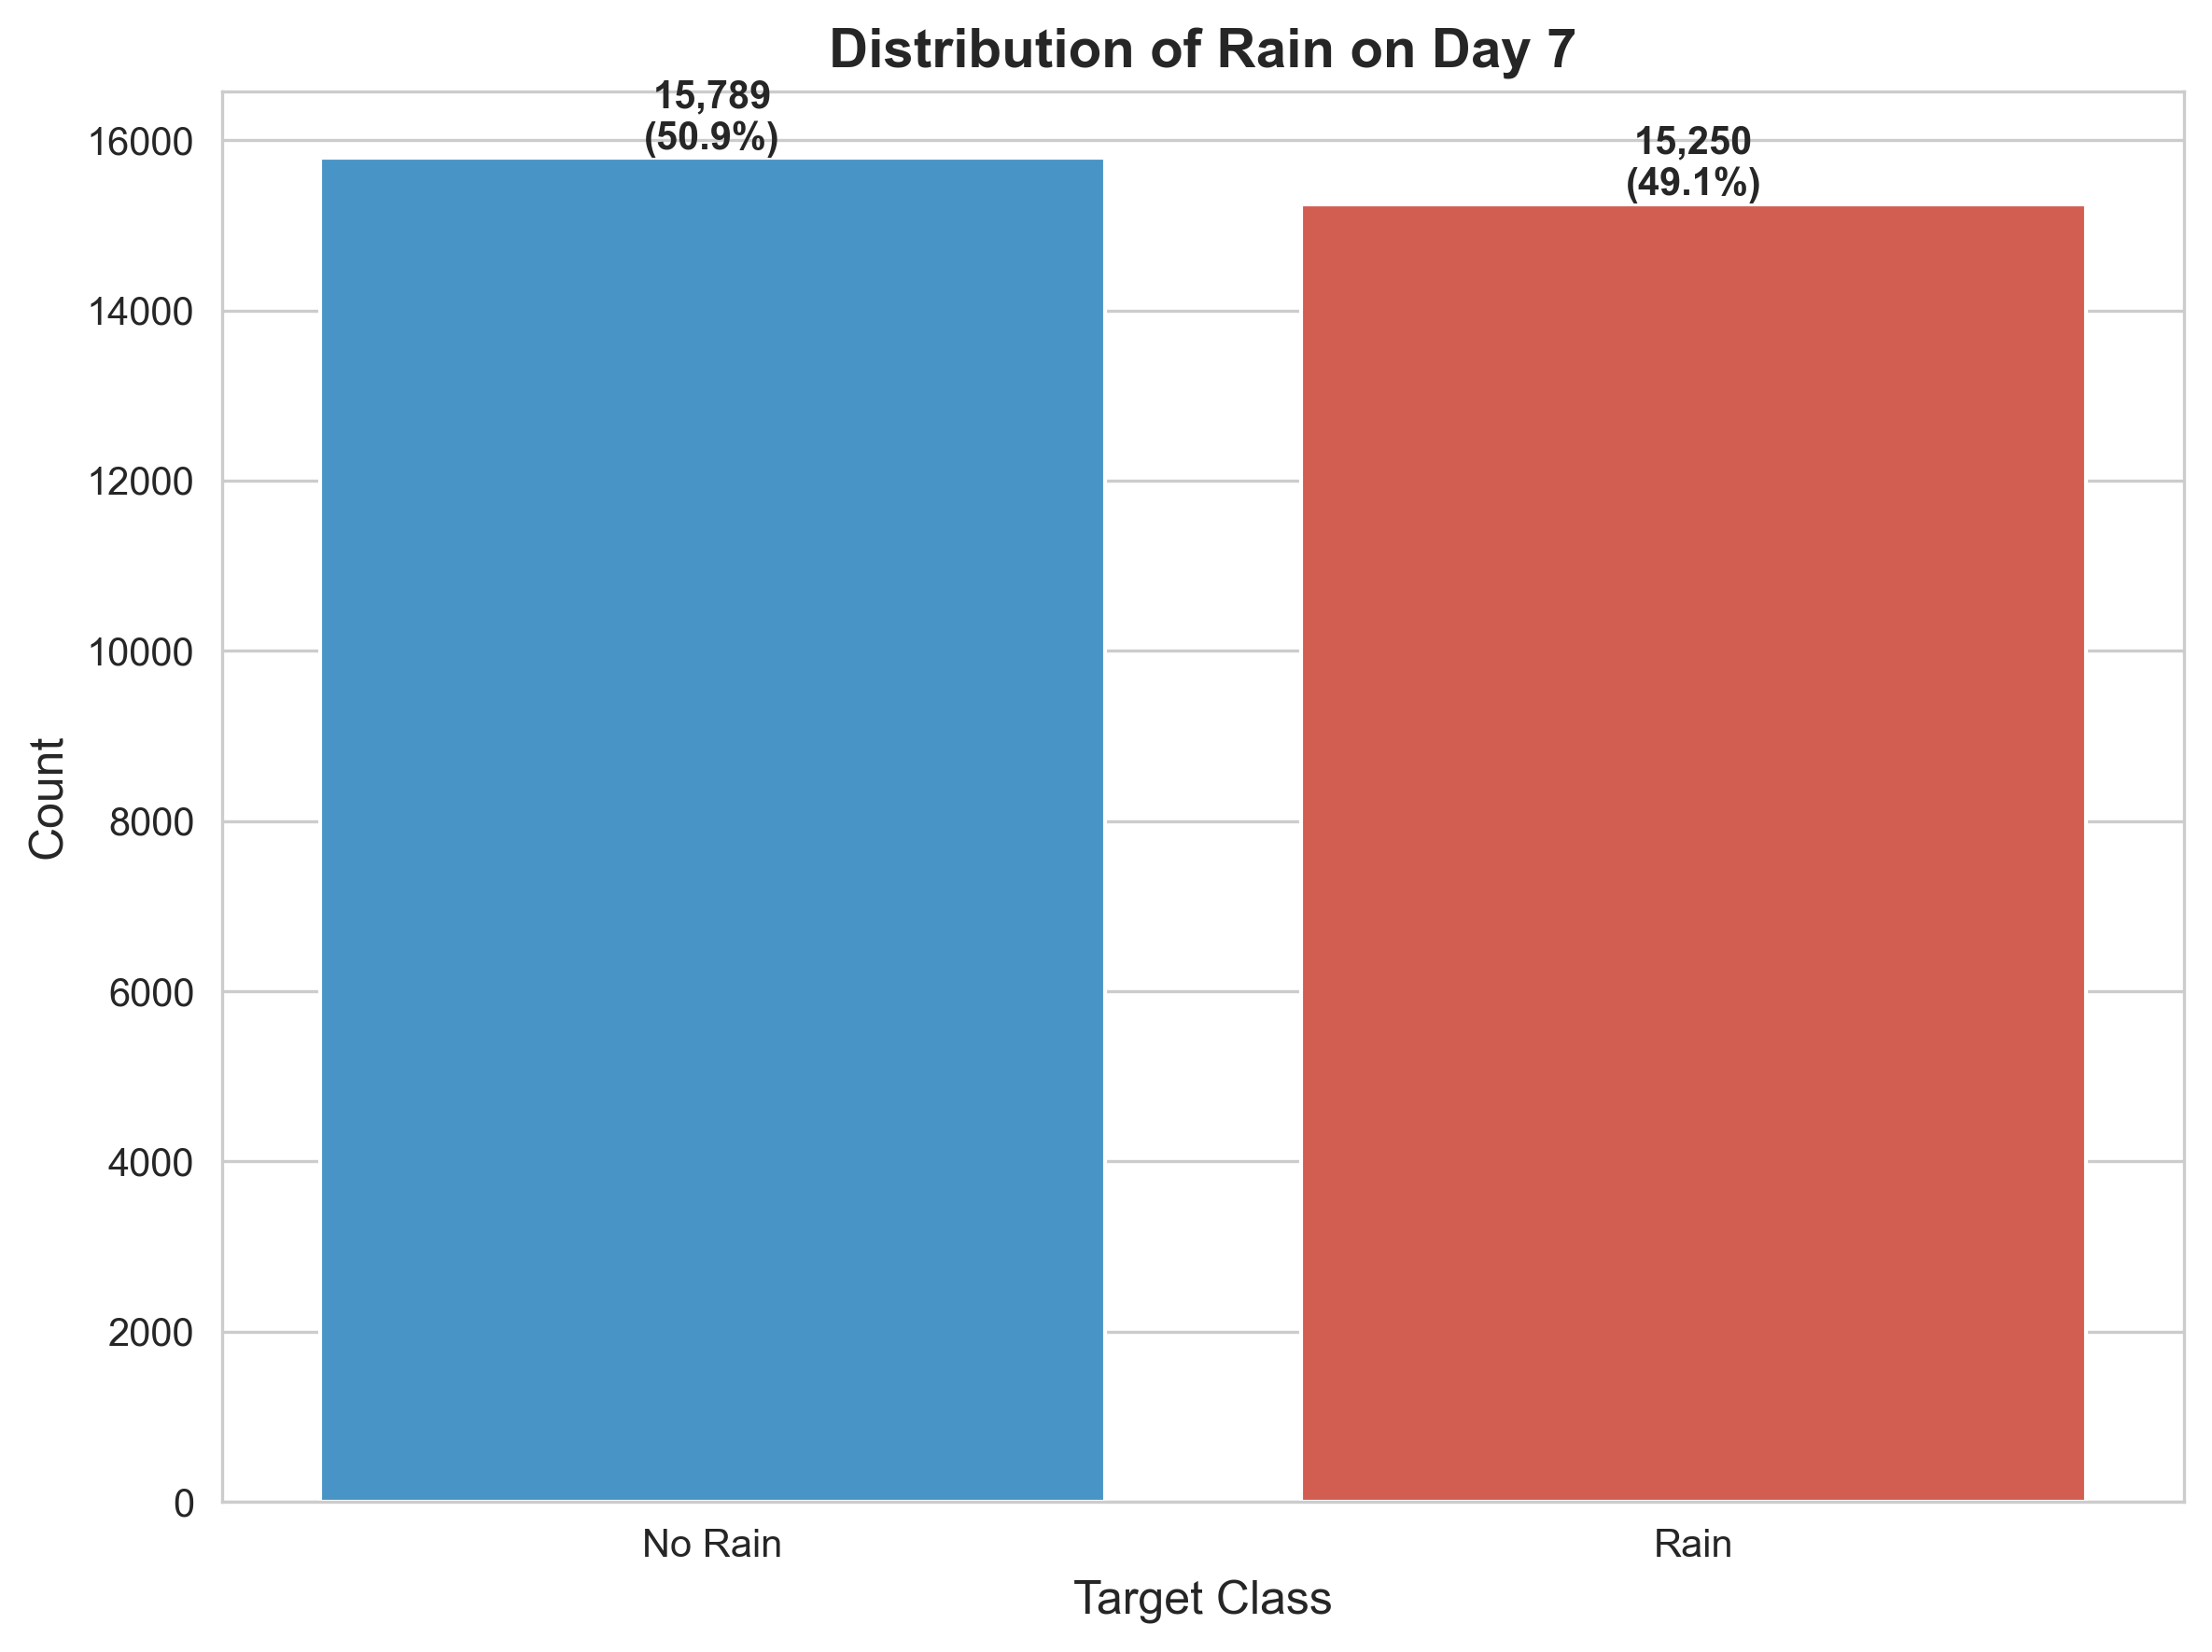

In [18]:
# Explore target variable distribution using weather module
fig = weather.plot_target_distribution(
    df, 
    target_name,
    labels_dict={0: 'No Rain', 1: 'Rain'},
    colors=['#3498db', '#e74c3c'],
    title='Distribution of Rain on Day 7'
)

In [19]:
# <Student to fill this section>
target_distribution_explanations = """
Target distribution shows balanced classes with approximately fifty-one percent no-rain days and forty-nine percent 
rain days. This near-equal split benefits model training without severe class imbalance. Seasonal patterns influence 
rain probability across different months throughout the year.
"""

In [20]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest `<precipitation_sum>`

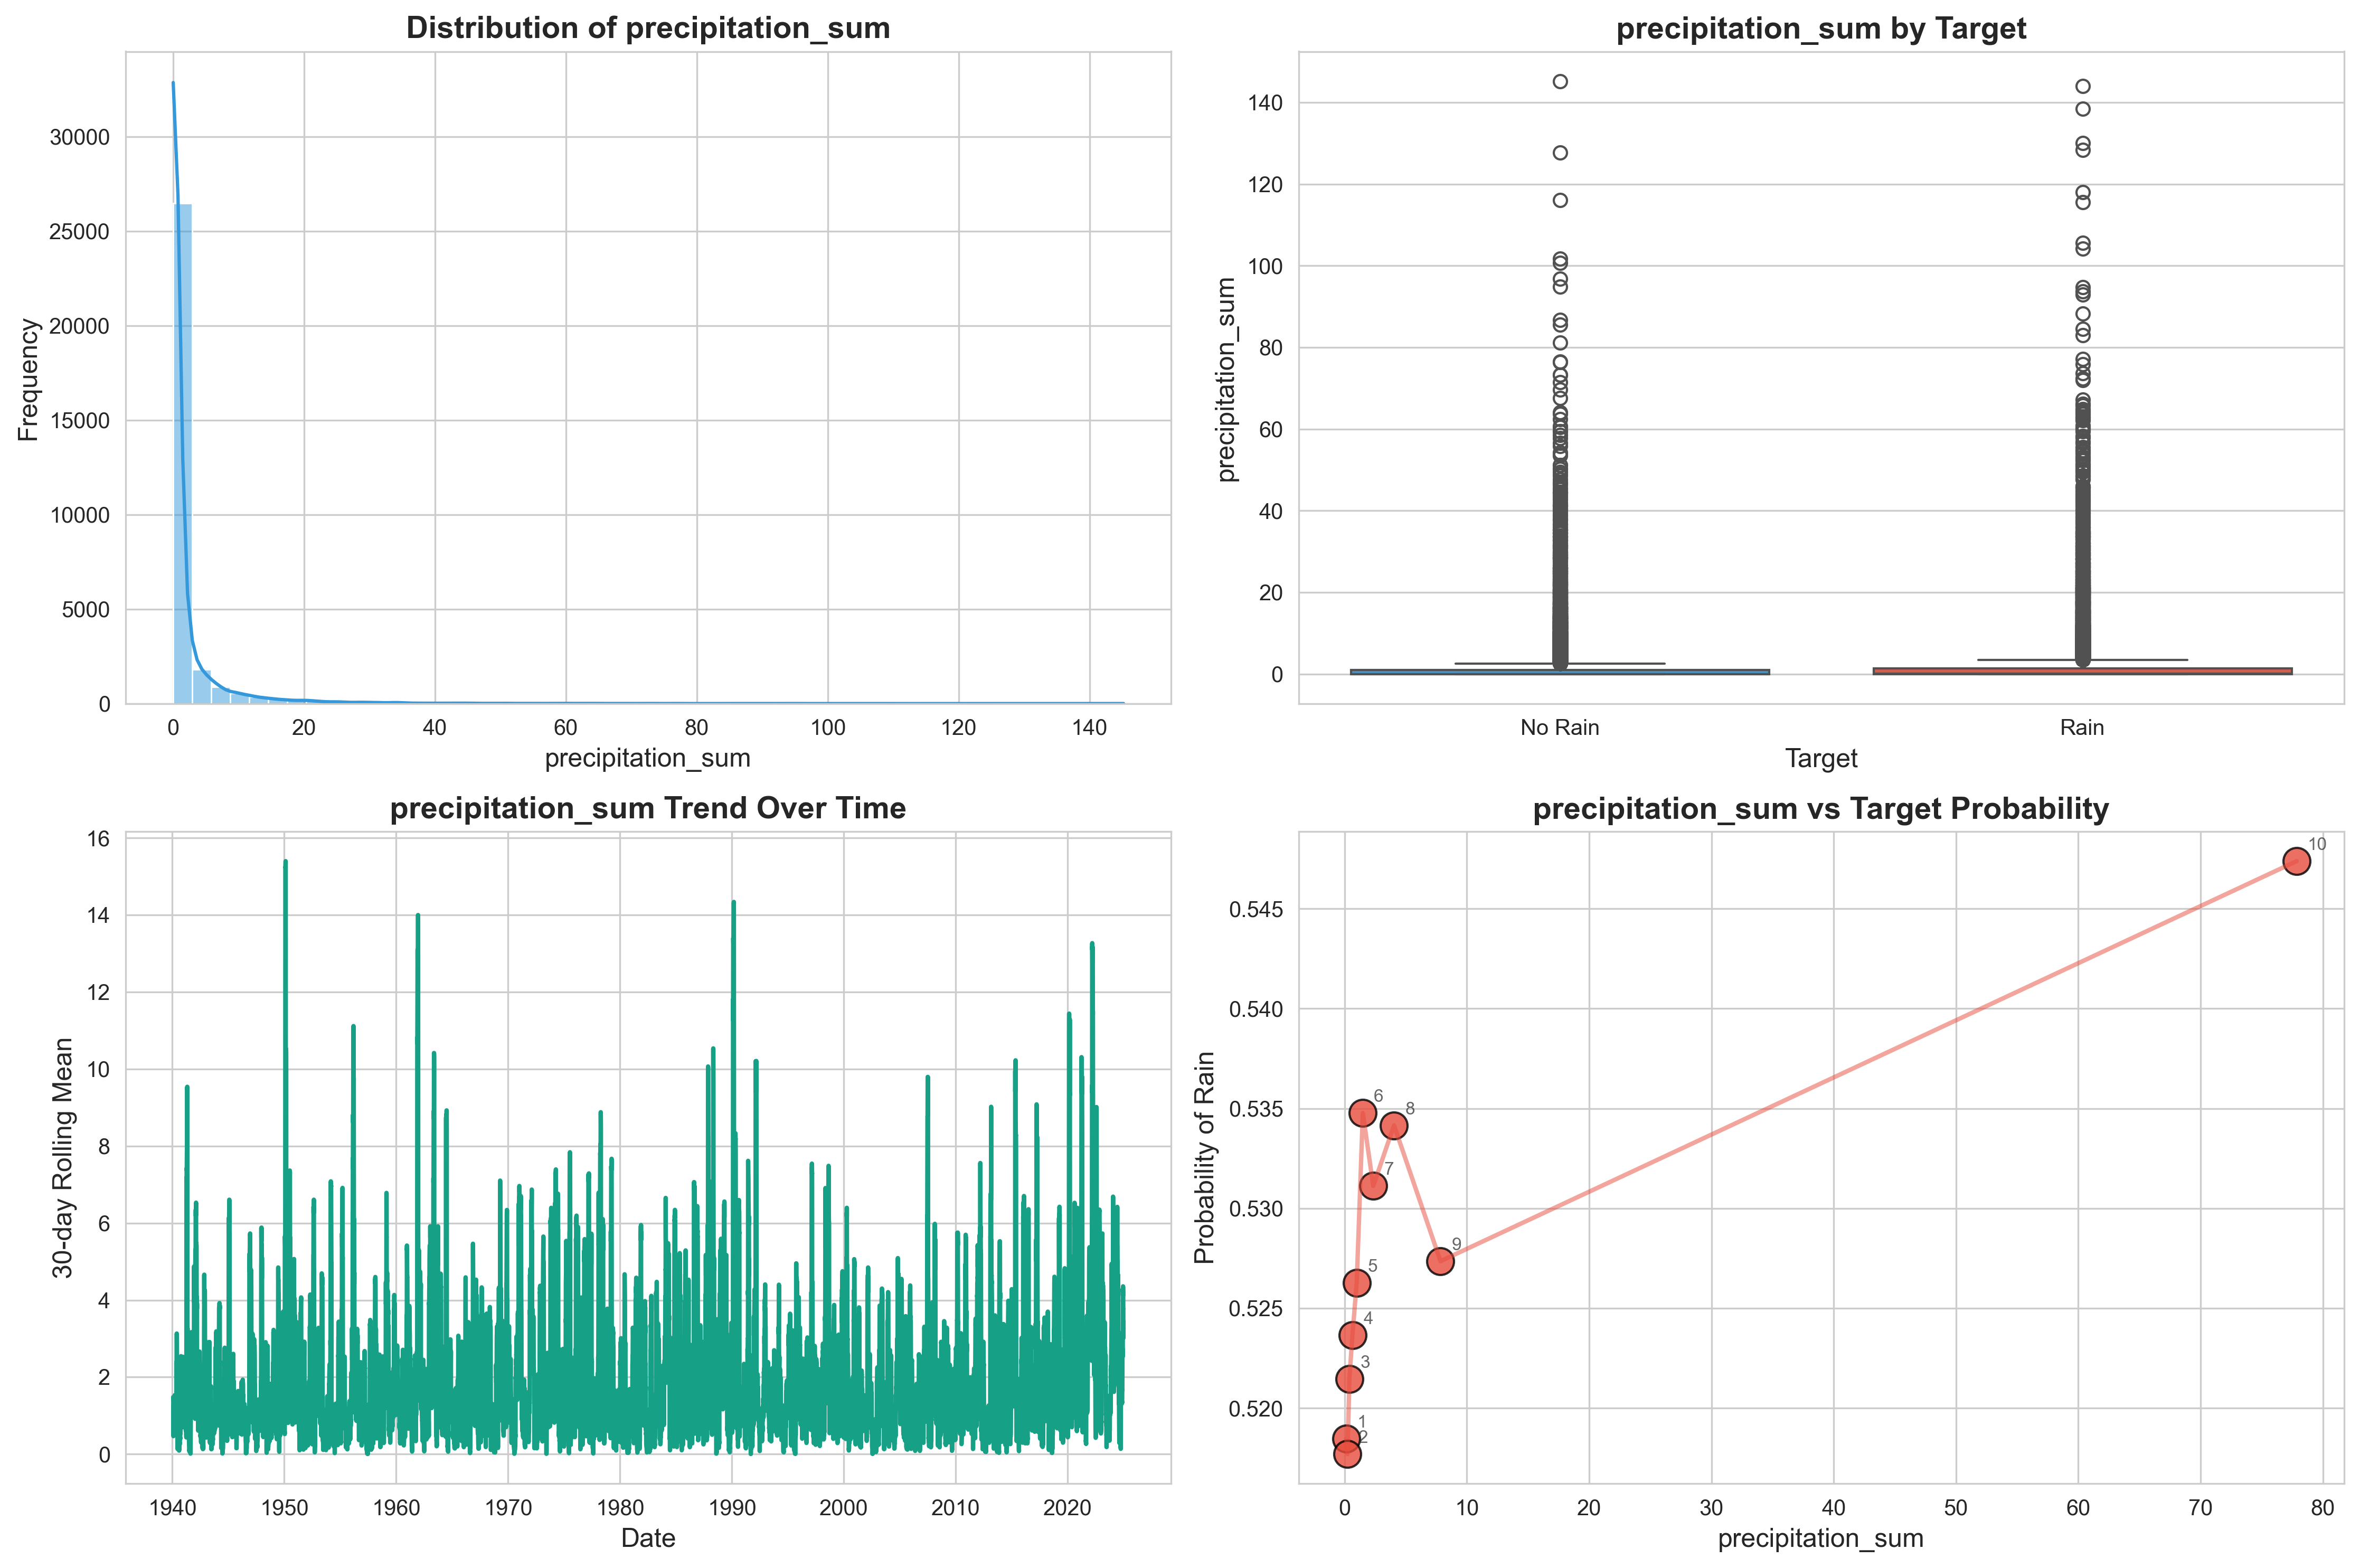

In [21]:
# Explore precipitation_sum feature using weather module
fig = weather.plot_feature_exploration_4panels(
    df, 
    feature_col='precipitation_sum',
    target_col=target_name,
    rolling_window=30,
    n_bins=10
)

In [22]:
feature_1_insights = """
Precipitation shows highly skewed distribution with numerous zero-rain days. Current precipitation demonstrates weak 
correlation with future rain as model treats each day independently, ignoring temporal weather evolution. Static 
feature approach cannot leverage weather persistence patterns critical for forecasting.
"""

In [23]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest `<temperature_2m_mean>`

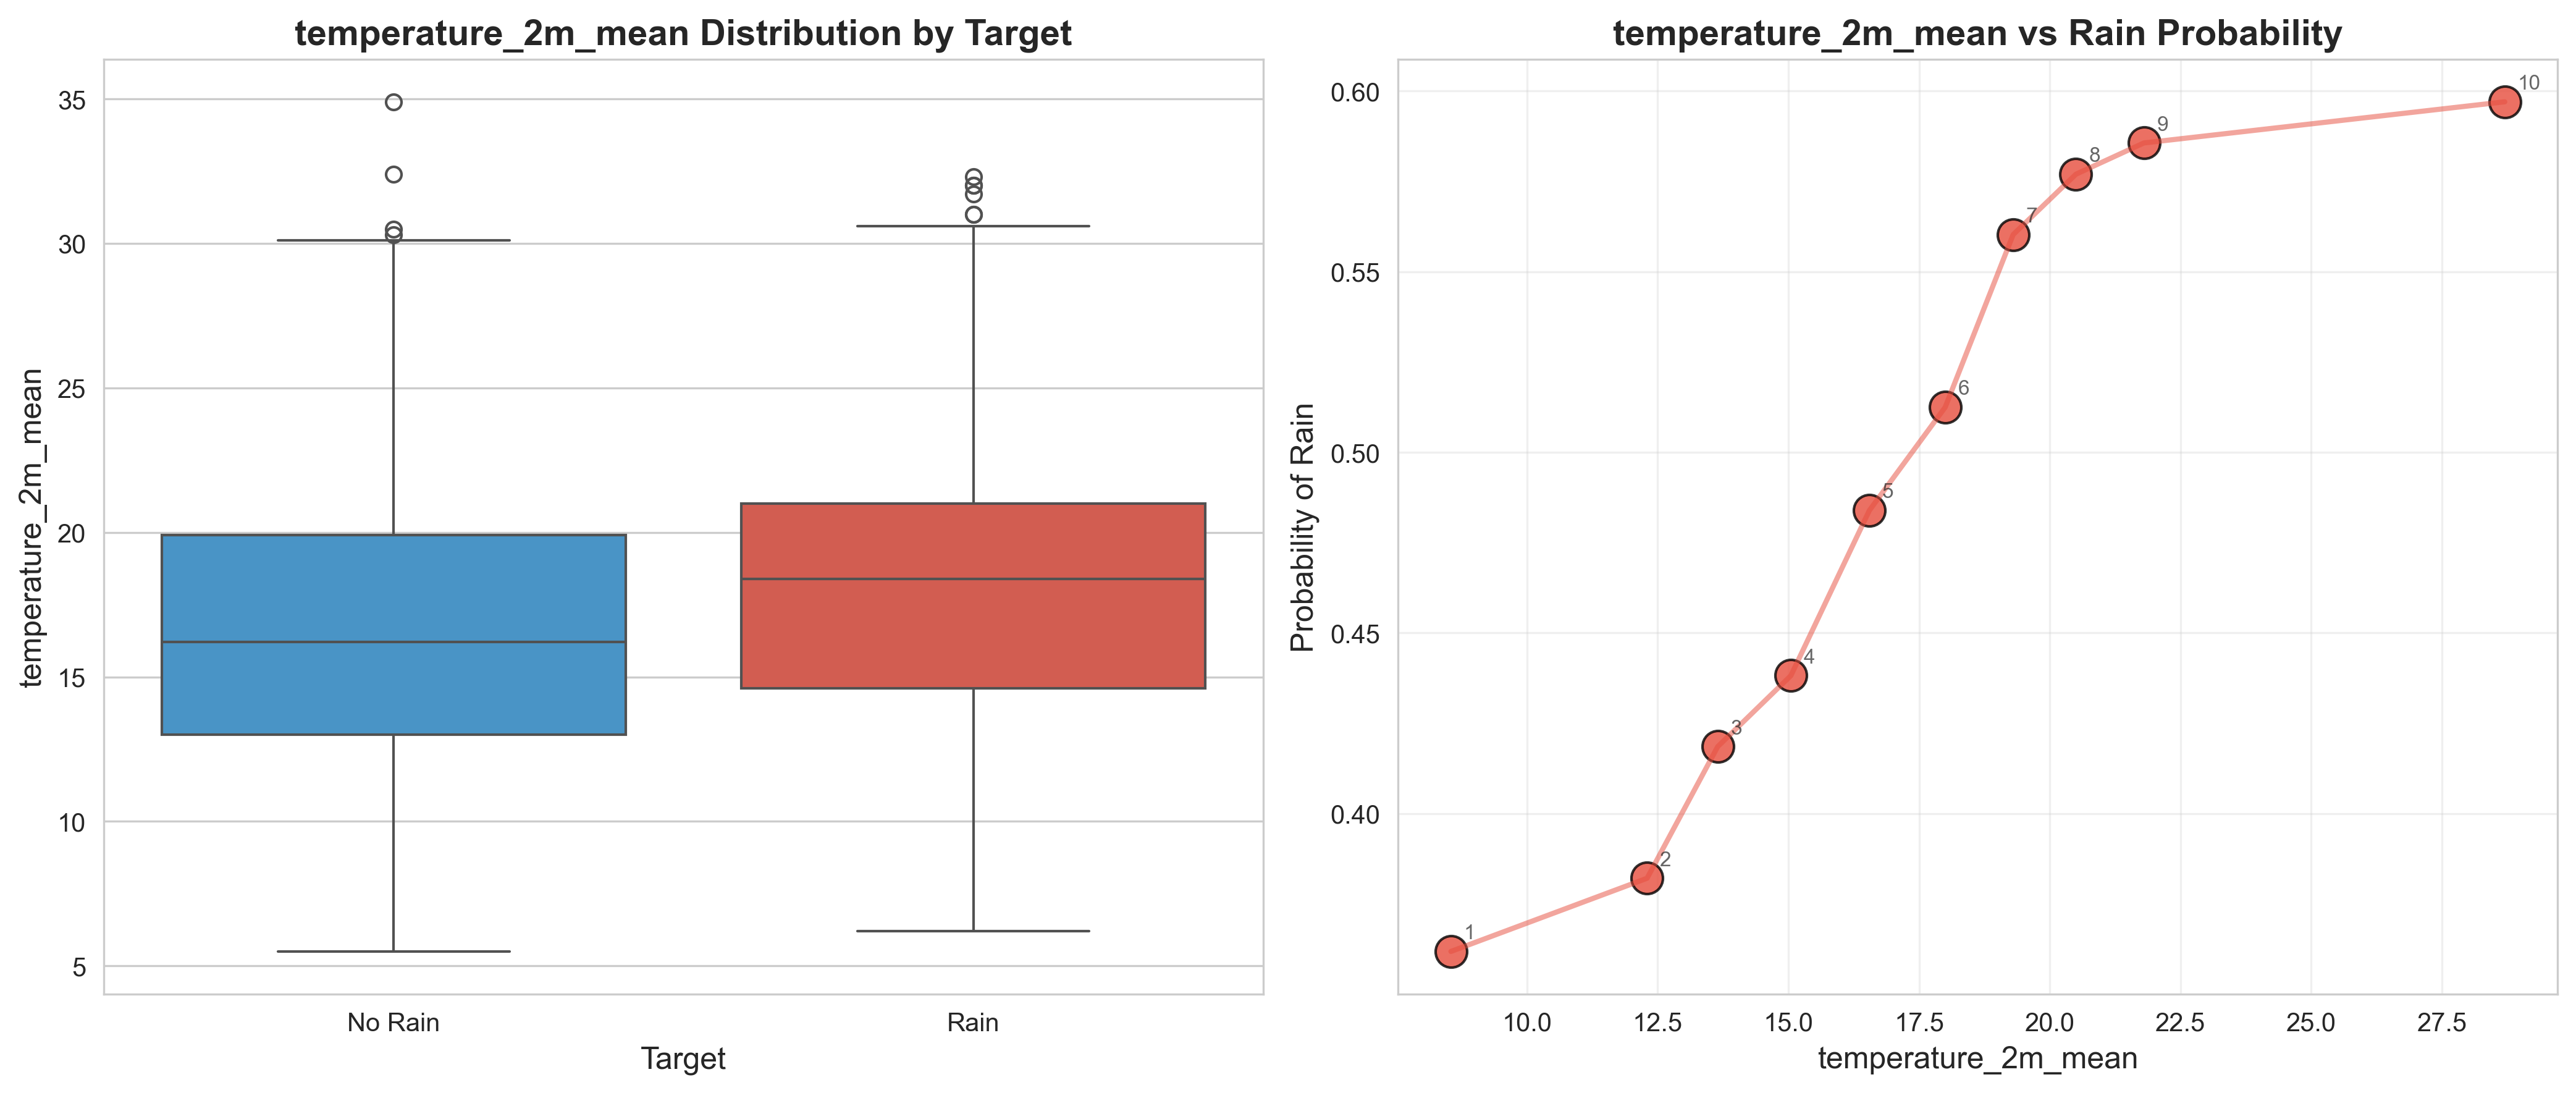

In [24]:
# Explore temperature_2m_mean feature using weather module
fig = weather.plot_feature_exploration_2panels(
    df,
    feature_col='temperature_2m_mean',
    target_col=target_name,
    n_bins=10
)

In [25]:
# <Student to fill this section>
feature_2_insights = """
Temperature exhibits clear inverse relationship with future rain probability. Lower temperatures correlate with increased 
likelihood of rain seven days ahead, reflecting seasonal weather patterns. Winter months show higher rain probability 
while summer temperatures indicate drier conditions ahead.
"""

In [26]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### D.1 Approach "Correlation Analysis"

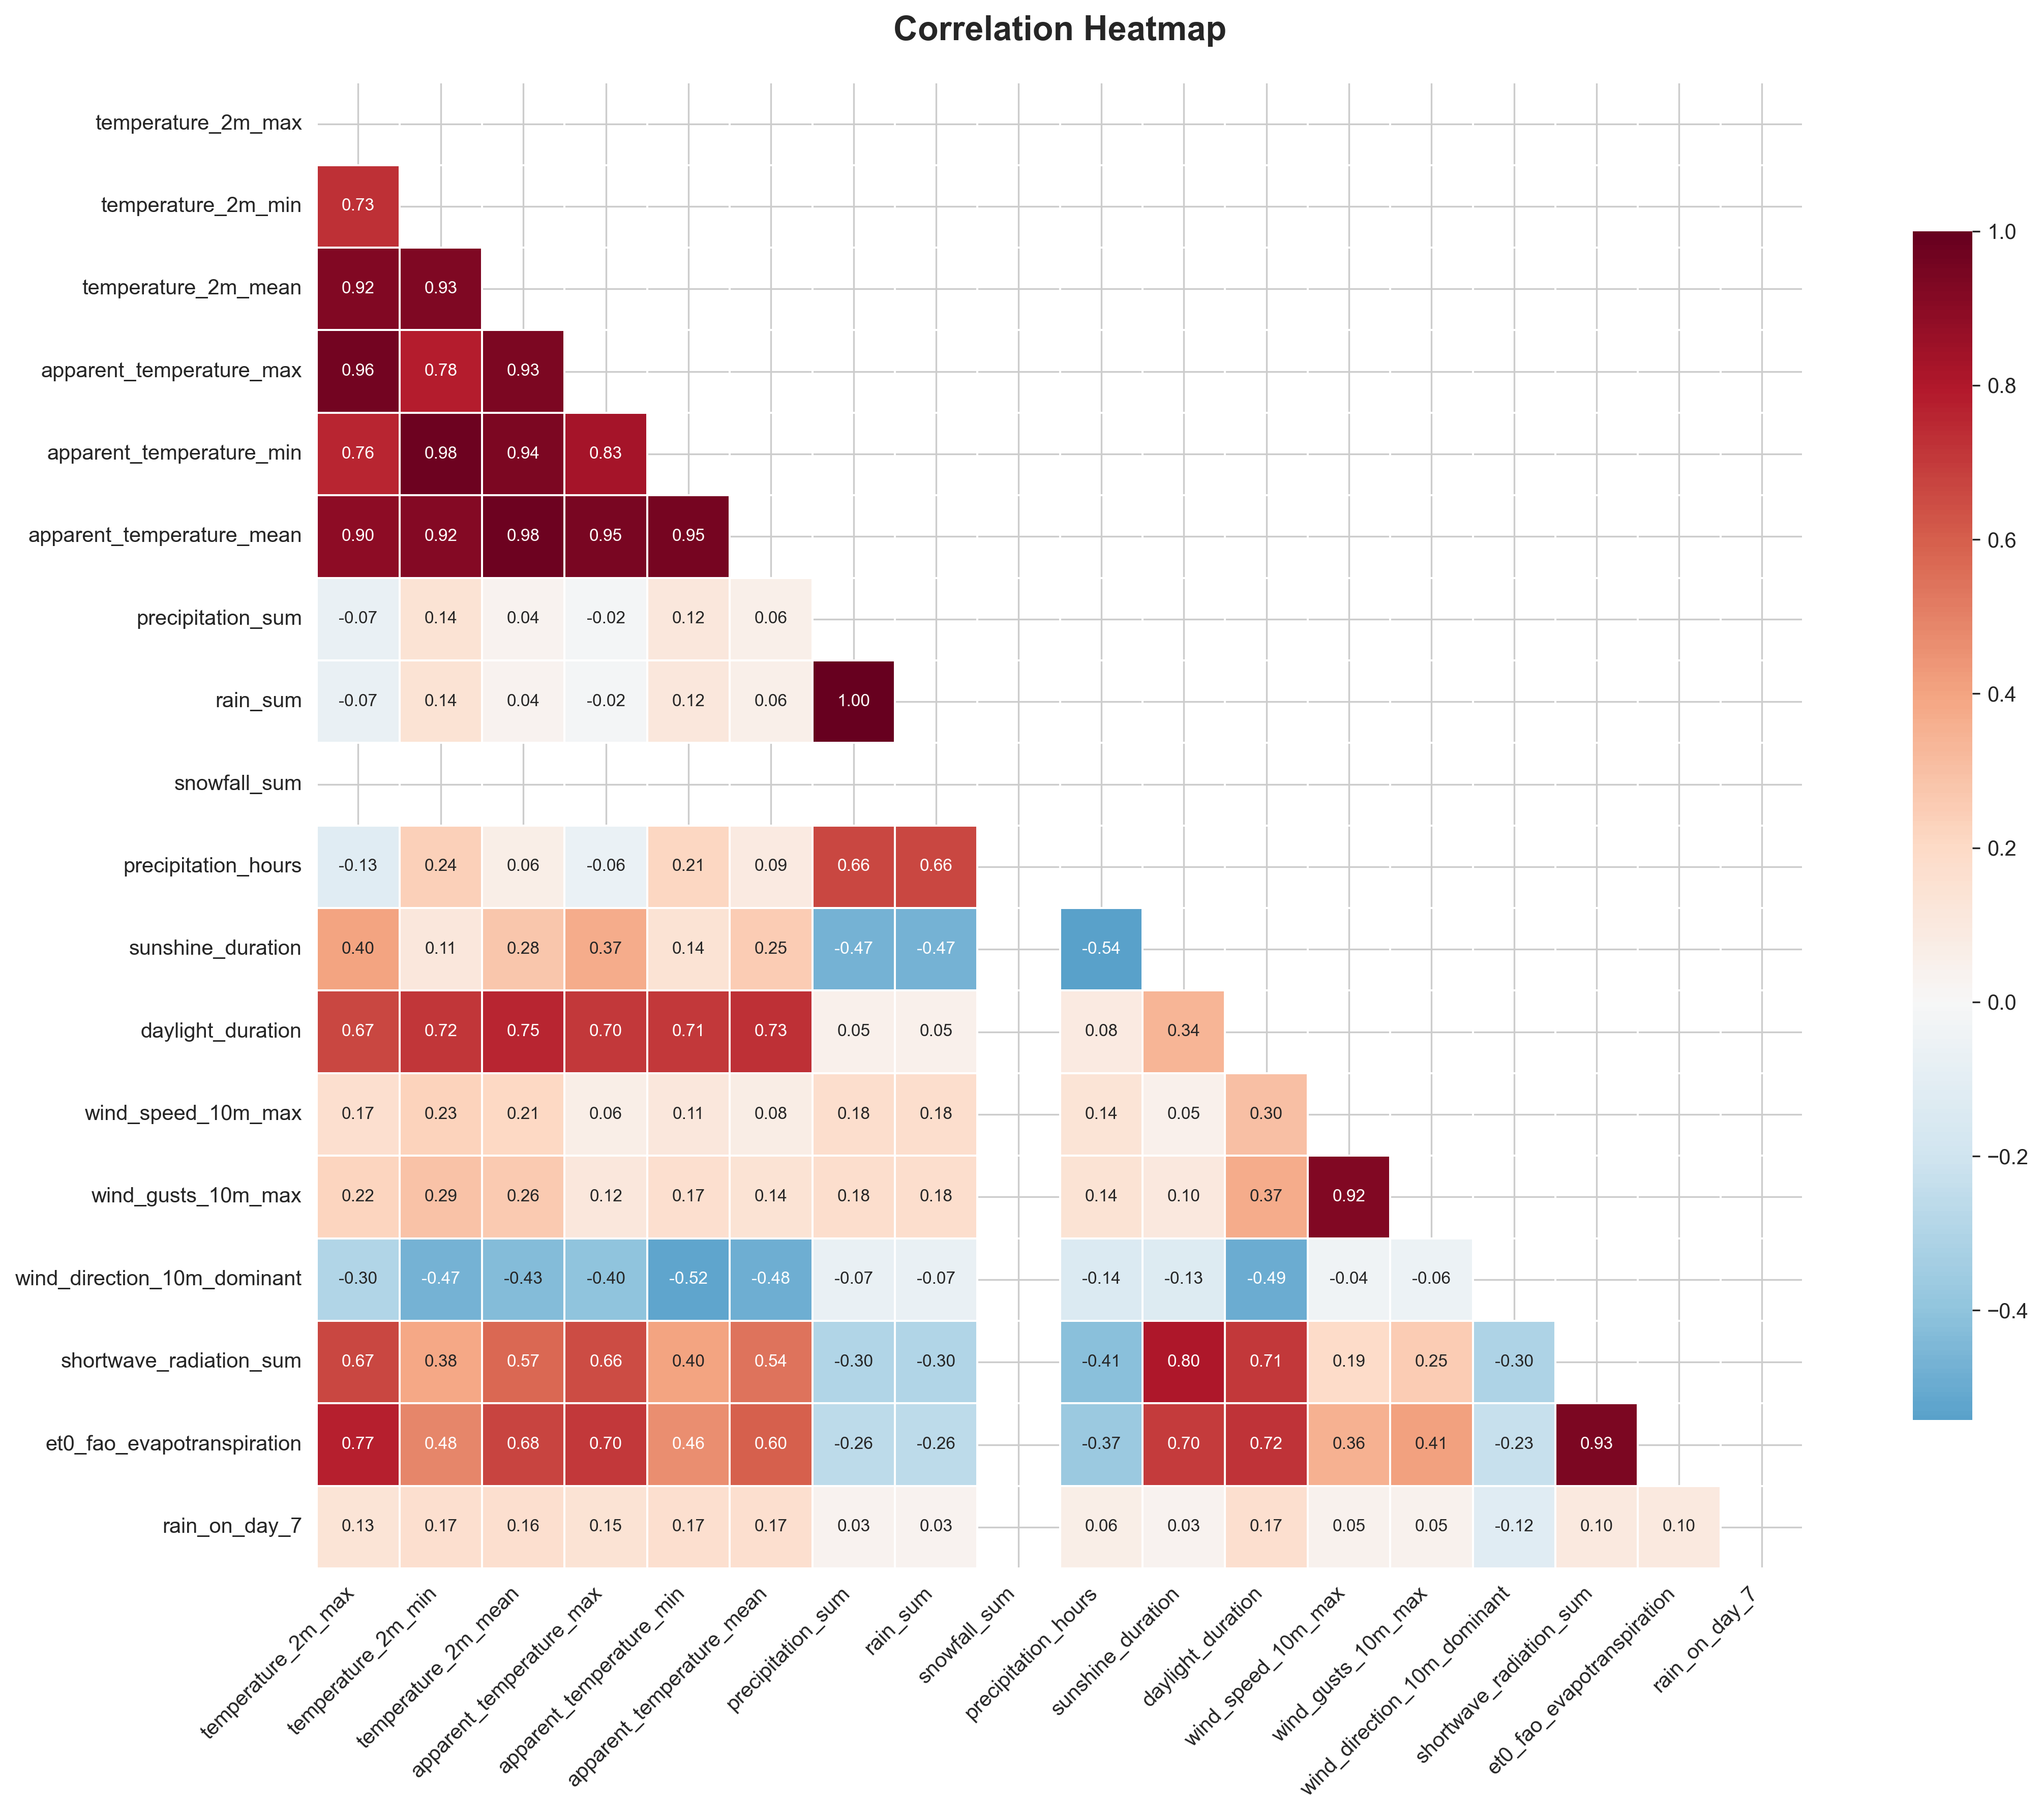

In [27]:
# Create correlation heatmap using weather module
fig = weather.plot_correlation_heatmap(
    df,
    exclude_cols=['weather_code']  # Exclude categorical variable
)

In [28]:
feature_selection_1_insights = """
Correlation analysis reveals weak relationships between individual features and target. Low correlations reflect 
fundamental limitation of static feature approach that ignores temporal dependencies. Weather evolves through 
time-series processes that point-in-time features cannot capture.
"""

In [29]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach "\<Mutual Information>"

Top 10 features by Mutual Information:
daylight_duration: 0.0204
temperature_2m_mean: 0.0195
apparent_temperature_mean: 0.0146
temperature_2m_min: 0.0139
temperature_2m_max: 0.0132
sunshine_duration: 0.0110
apparent_temperature_min: 0.0107
wind_direction_10m_dominant: 0.0084
apparent_temperature_max: 0.0082
shortwave_radiation_sum: 0.0056


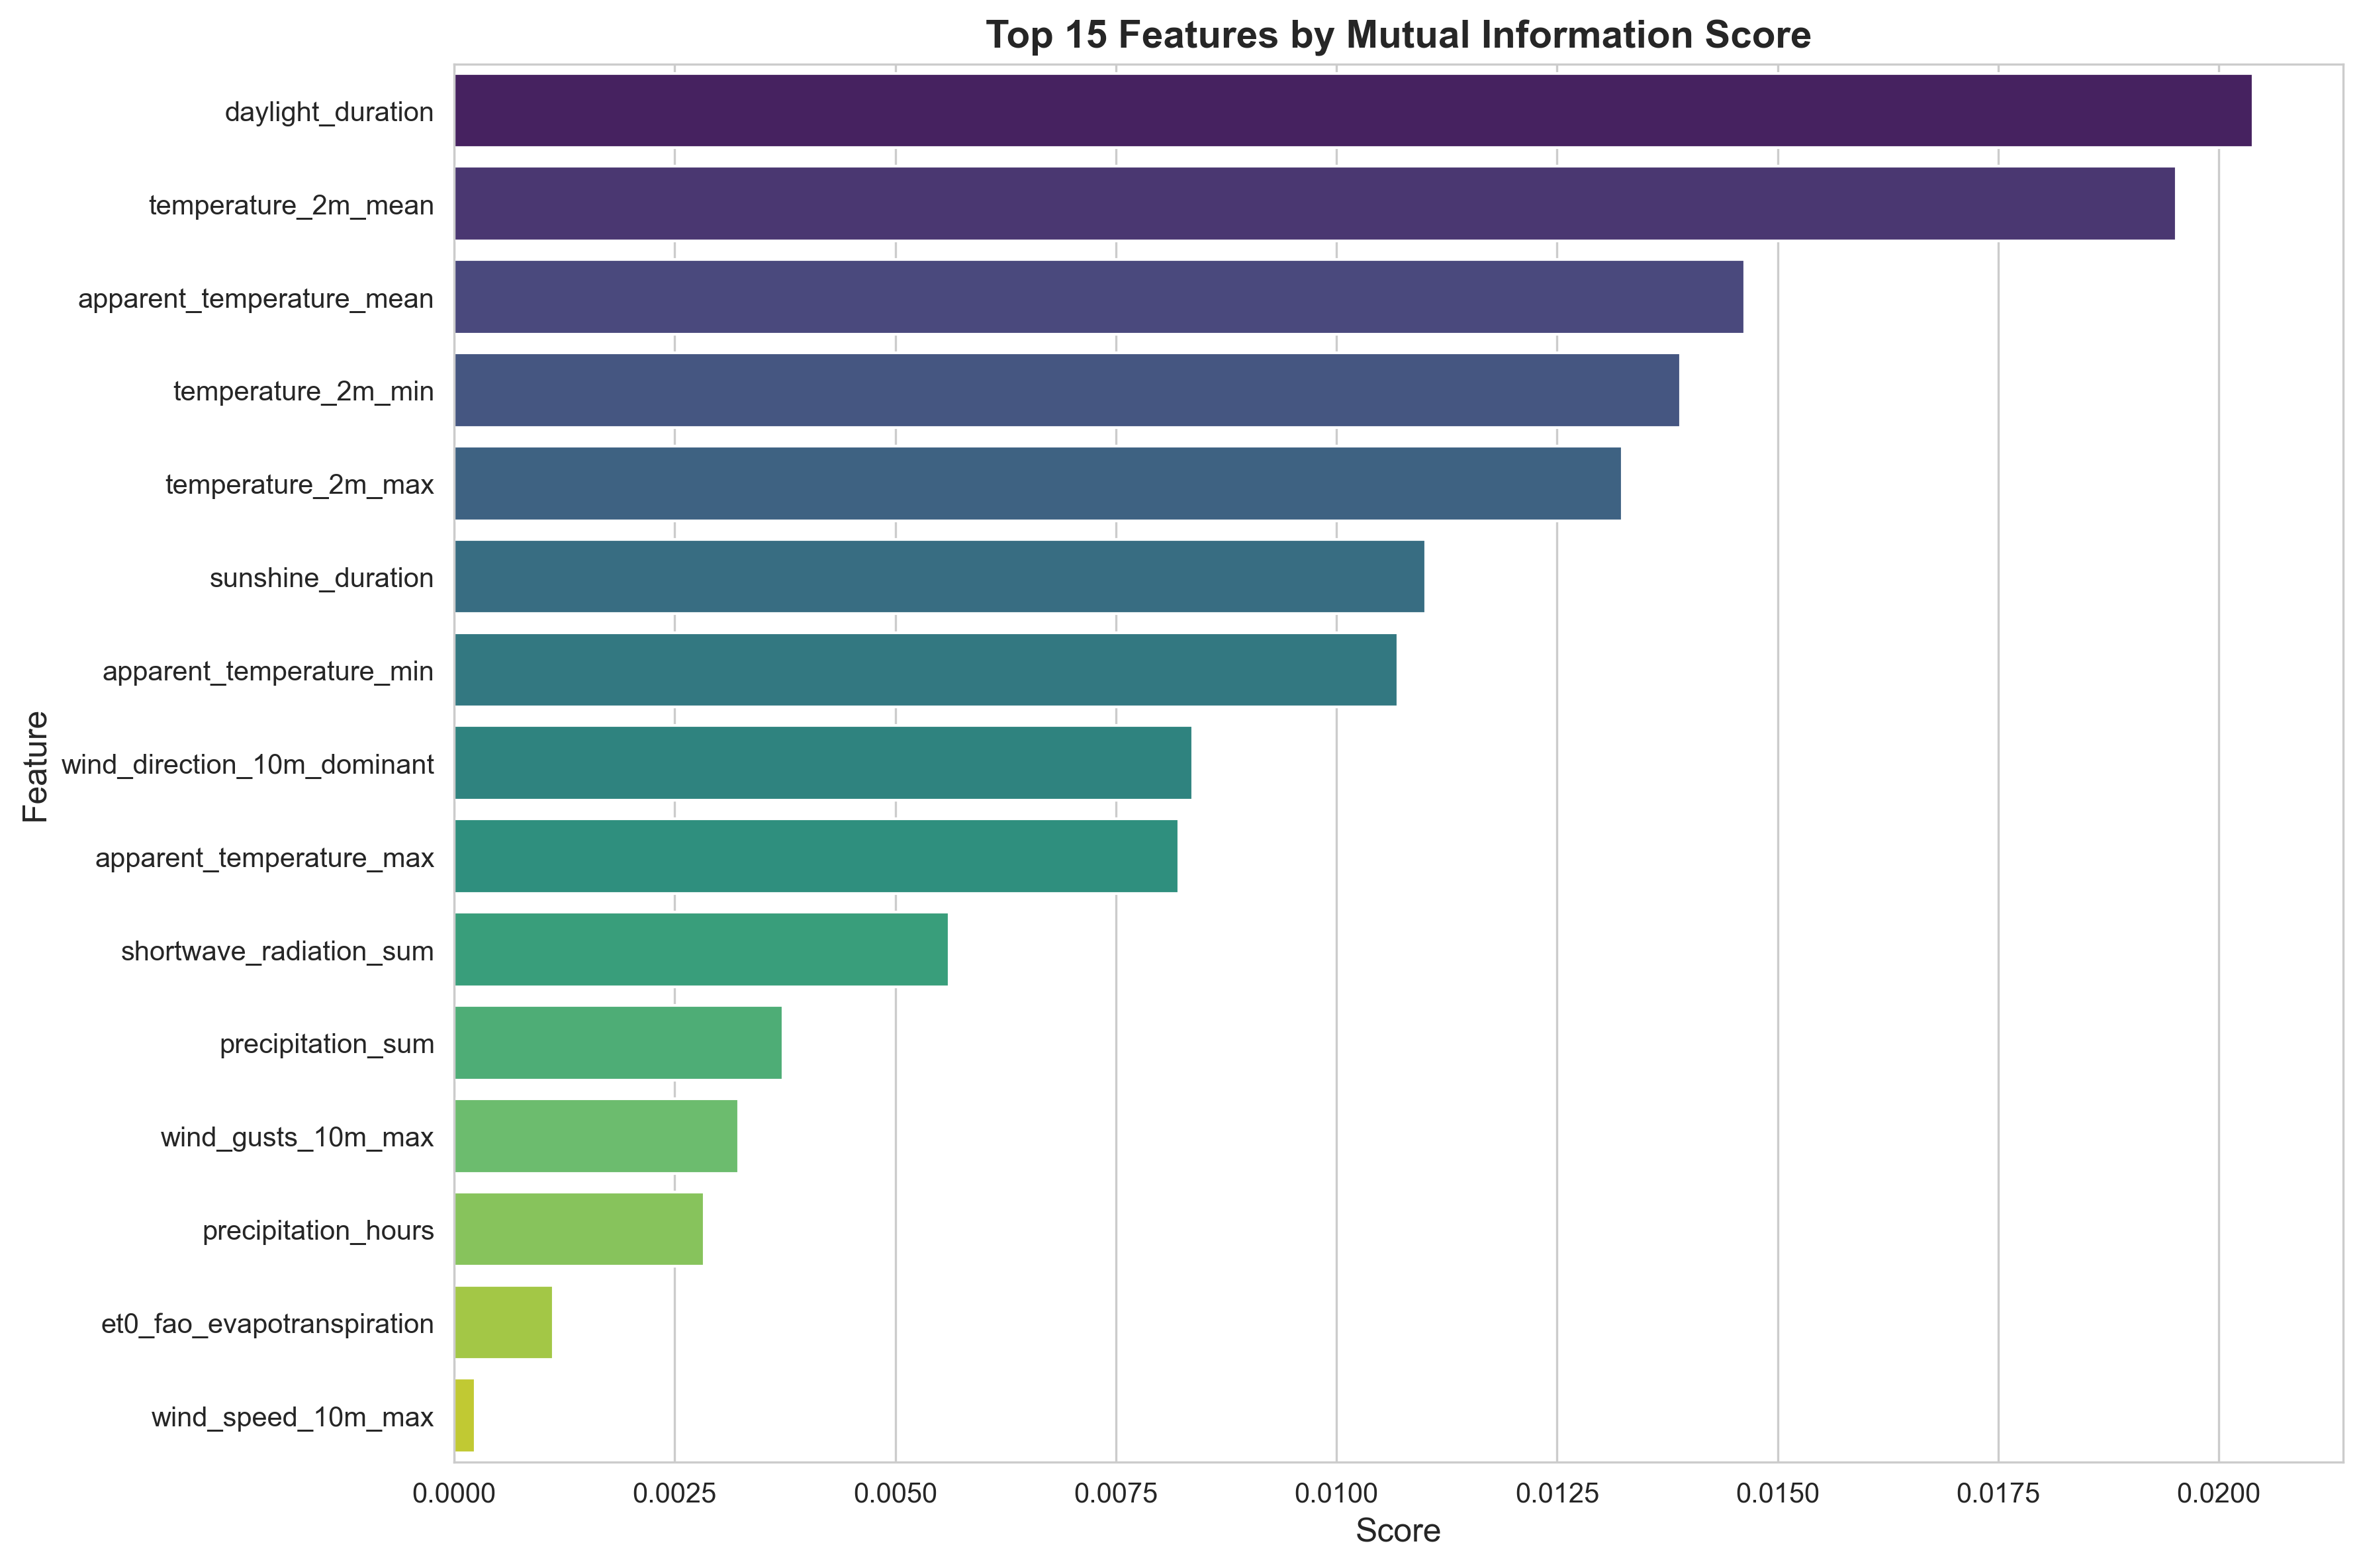

In [30]:
# Mutual Information Feature Selection
# Prepare data for mutual information calculation
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features = [f for f in numeric_features if f != target_name and f != 'weather_code']

# Calculate mutual information scores
X_mi = df[numeric_features]
y_mi = df[target_name]
mi_scores = mutual_info_classif(X_mi, y_mi, random_state=42)

# Create DataFrame for visualization
mi_df = pd.DataFrame({
    'feature': numeric_features,
    'score': mi_scores
}).sort_values('score', ascending=False)

# Visualize using weather module
fig = weather.plot_feature_importance(
    mi_df,
    score_col='score',
    feature_col='feature',
    top_n=15,
    title='Top 15 Features by Mutual Information Score'
)

# Print top features
print("Top 10 features by Mutual Information:")
for idx, row in mi_df.head(10).iterrows():
    print(f"{row['feature']}: {row['score']:.4f}")

In [31]:
feature_selection_2_insights = """
Mutual information captures seasonal patterns through daylight duration and temperature features. However, static 
analysis cannot identify temporal weather evolution critical for forecasting. Model limited to seasonal trends 
while missing dynamic atmospheric processes.
"""

In [32]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

## D.z Final Selection of Features

In [33]:
# Select features using weather module function
features_list = weather.get_feature_list(df, target_name)

print(f"Selected {len(features_list)} features:")
print(features_list)

Selected 16 features:
['weather_code', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean', 'rain_sum', 'precipitation_hours', 'sunshine_duration', 'daylight_duration', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration']


In [34]:
feature_selection_explanations = """
Retained all weather features except redundant variables. Excluded precipitation_sum, snowfall_sum as duplicates 
in Sydney climate. Removed sunrise, sunset since daylight_duration captures temporal information. Comprehensive feature 
set enables model to identify complex weather patterns.
"""

In [35]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Transformation "Missing Values Check"

In [36]:
# Check for missing values
print("Missing values per column:")
print(df[features_list + [target_name]].isnull().sum()[df[features_list + [target_name]].isnull().sum() > 0])

# The target has missing values due to the 7-day shift
# Remove rows with missing target values
df_clean = df.dropna(subset=[target_name])

print(f"\nOriginal dataset size: {len(df)}")
print(f"Clean dataset size: {len(df_clean)}")
print(f"Rows removed: {len(df) - len(df_clean)}")

Missing values per column:
Series([], dtype: int64)

Original dataset size: 31039
Clean dataset size: 31039
Rows removed: 0


In [37]:
# <Student to fill this section>
data_cleaning_1_explanations = """
Dataset exhibits high quality with no missing values after target creation. Clean historical weather records 
spanning eighty-five years provide robust training foundation. No additional cleaning required for modeling pipeline 
implementation and experimentation phases.
"""

In [38]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

---
## F. Feature Engineering

### F.1 New Feature "Month"

In [39]:
# Extract month feature using weather module function
df = weather.extract_month_feature(df)

# Update features list to use month instead of time
features_list = weather.get_feature_list(df, target_name)

# Display the month distribution
print("Month distribution in the dataset:")
print(df['month'].value_counts().sort_index())
print(f"\nTotal features: {len(features_list)}")
print(f"\nUpdated features list (first 10): {features_list[:10]}")

Month distribution in the dataset:
month
April        2550
August       2635
December     2628
February     2402
January      2634
July         2635
June         2550
March        2635
May          2635
November     2550
October      2635
September    2550
Name: count, dtype: int64

Total features: 17

Updated features list (first 10): ['weather_code', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean', 'rain_sum', 'precipitation_hours', 'sunshine_duration']


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


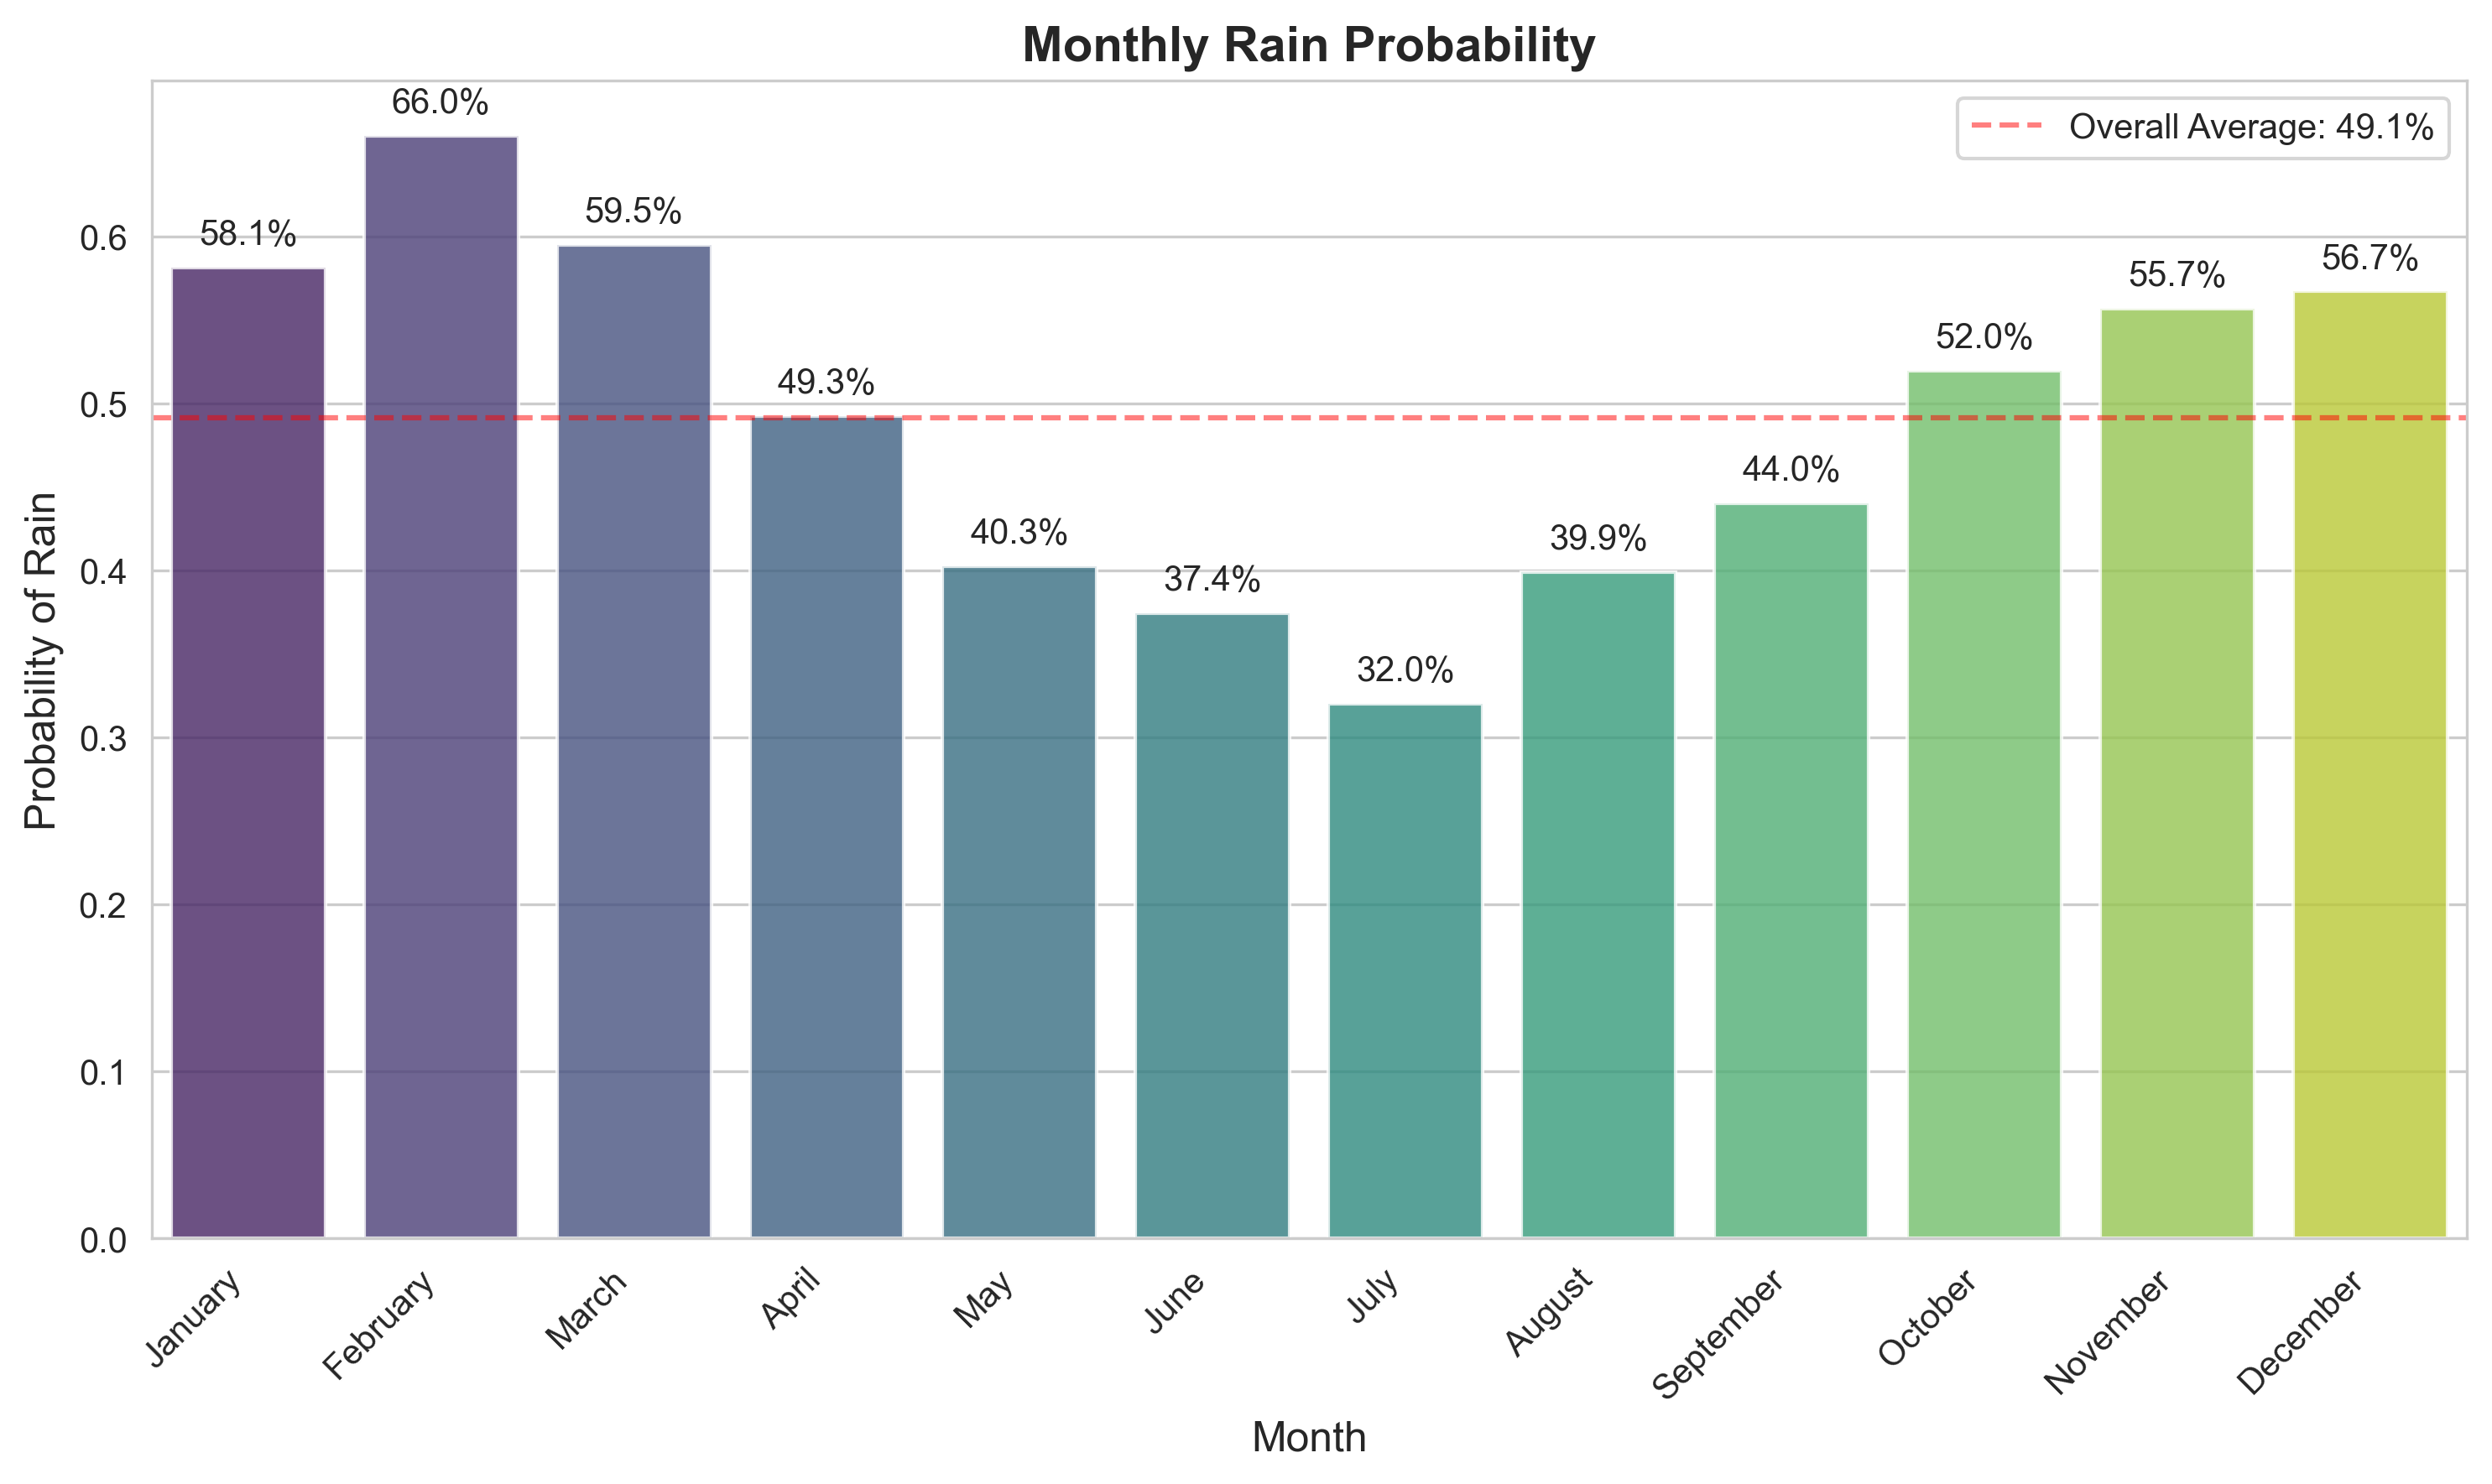

In [40]:
# Visualize monthly rain probability using weather module
fig = weather.plot_monthly_probabilities(df, target_name)

In [41]:
feature_engineering_1_explanations = """
Month feature engineered from timestamp captures strong seasonal patterns. Treated as categorical variable preserving 
non-ordinal nature of cyclical time. Clear monthly variations show winter months with higher rain probability 
versus drier summer periods.
"""

In [42]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [43]:
# Split data using weather module function
X = df[features_list]
y = df[target_name]

# Use the weather module's train_val_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = weather.train_val_test_split(
    X, y, test_size=0.2, val_size=0.2, random_state=42
)

print(f"Training set size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set size: {len(X_val)} ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

# Check target distribution in each set
print(f"\nTarget distribution:")
print(f"Train: {y_train.mean():.2%} rain days")
print(f"Val: {y_val.mean():.2%} rain days")
print(f"Test: {y_test.mean():.2%} rain days")

# Print column names to diagnose issue
print(f"\nColumns in X_train: {X_train.columns.tolist()}")
print(f"Number of columns: {len(X_train.columns)}")
print(f"Number of unique columns: {len(X_train.columns.unique())}")

Training set size: 18623 (60.0%)
Validation set size: 6208 (20.0%)
Test set size: 6208 (20.0%)

Target distribution:
Train: 49.39% rain days
Val: 48.87% rain days
Test: 48.63% rain days

Columns in X_train: ['weather_code', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean', 'rain_sum', 'precipitation_hours', 'sunshine_duration', 'daylight_duration', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration', 'month']
Number of columns: 17
Number of unique columns: 17


In [44]:
data_splitting_explanations = """
Stratified split maintains target distribution across train, validation, and test sets. Sixty-twenty-twenty split 
provides sufficient training data while enabling robust validation and testing. Balanced classes preserved ensuring 
consistent evaluation across all data partitions.
"""

In [45]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Data Transformation "One-Hot Encoding and Standardization"

In [46]:
# One-hot encoding and standardization using weather module functions
# Split features by type
categorical_features, numerical_features = weather.split_features_by_type(features_list)

print(f"Categorical features: {categorical_features}")
print(f"Numerical features ({len(numerical_features)}): {numerical_features[:5]}...")

# Create preprocessing pipeline using weather module function
preprocessor = weather.create_preprocessor(numerical_features, categorical_features, use_standard_scaler=True)

# Fit on training data and transform all sets
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_val_transformed = preprocessor.transform(X_val)
X_test_transformed = preprocessor.transform(X_test)

# Get feature names
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(cat_feature_names)

# Convert to DataFrames
X_train = pd.DataFrame(X_train_transformed, columns=all_feature_names, index=X_train.index)
X_val = pd.DataFrame(X_val_transformed, columns=all_feature_names, index=X_val.index)
X_test = pd.DataFrame(X_test_transformed, columns=all_feature_names, index=X_test.index)

print(f"\nFinal shape - X_train: {X_train.shape}, X_val: {X_val.shape}, X_test: {X_test.shape}")
print(f"Total features: {len(all_feature_names)}")

Categorical features: ['month', 'weather_code']
Numerical features (15): ['temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min']...

Final shape - X_train: (18623, 35), X_val: (6208, 35), X_test: (6208, 35)
Total features: 35


In [47]:
data_transformation_1_explanations = """
Pipeline combines one-hot encoding for categorical variables with standardization for numerical features. Prevents 
data leakage by fitting transformations exclusively on training data. Creates thirty-five features including encoded 
month and weather code categorical variables. StandardScaler normalizes features ensuring equal contribution during model training. Zero mean and unit variance 
transformation improves optimization convergence. Scaler parameters derived from training set prevent information 
leakage maintaining valid performance estimates.
"""

In [48]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

In [49]:
# Save processed data to data/processed directory with exp_1 suffix

# Create processed data directory if it doesn't exist
processed_path = '../../data/processed/'
os.makedirs(processed_path, exist_ok=True)

# Save the processed datasets with exp_1 suffix
X_train.to_csv(os.path.join(processed_path, 'X_train_exp_1.csv'), index=False)
X_val.to_csv(os.path.join(processed_path, 'X_val_exp_1.csv'), index=False)
X_test.to_csv(os.path.join(processed_path, 'X_test_exp_1.csv'), index=False)
y_train.to_csv(os.path.join(processed_path, 'y_train_exp_1.csv'), index=False, header=['rain_on_day_7'])
y_val.to_csv(os.path.join(processed_path, 'y_val_exp_1.csv'), index=False, header=['rain_on_day_7'])
y_test.to_csv(os.path.join(processed_path, 'y_test_exp_1.csv'), index=False, header=['rain_on_day_7'])

print(f"Processed data saved to {processed_path}:")
print(f"  - X_train_exp_1.csv: {X_train.shape}")
print(f"  - X_val_exp_1.csv: {X_val.shape}")
print(f"  - X_test_exp_1.csv: {X_test.shape}")
print(f"  - y_train_exp_1.csv: {y_train.shape}")
print(f"  - y_val_exp_1.csv: {y_val.shape}")
print(f"  - y_test_exp_1.csv: {y_test.shape}")

Processed data saved to ../../data/processed/:
  - X_train_exp_1.csv: (18623, 35)
  - X_val_exp_1.csv: (6208, 35)
  - X_test_exp_1.csv: (6208, 35)
  - y_train_exp_1.csv: (18623,)
  - y_val_exp_1.csv: (6208,)
  - y_test_exp_1.csv: (6208,)


---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate

In [50]:
# <Student to fill this section>
primary_metric = 'AUC'
secondary_metric = 'f1'

In [51]:
performance_metrics_explanations = """
AUC measures overall discrimination capability between rain and no-rain classes. F1-score balances precision and 
recall for practical deployment needs. Metrics chosen address both ranking quality and classification performance 
for weather-sensitive decision making.
"""

In [52]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [53]:
# use logistic regression as baseline


In [54]:
algorithm_selection_explanations = """
Logistic regression provides interpretable baseline for binary classification. Linear model captures basic relationships 
between weather features and rain probability. Regularization handles correlated features while balanced class weights 
address target distribution for fair learning across both classes.
"""

In [55]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [56]:
# Set constant hyperparameters for Logistic Regression
# Note: C will be optimized separately
hyperparameters = {
    'penalty': 'l2',          # L2 regularization (Ridge)
    'solver': 'lbfgs',        # Optimization algorithm for binary classification
    'max_iter': 1000,         # Maximum iterations for convergence
    'random_state': 32,       # For reproducibility
    'class_weight': 'balanced'  # Automatically adjust weights inversely proportional to class frequencies
}

In [57]:
hyperparameters_selection_explanations = """
L2 regularization provides stability with correlated weather features. LBFGS solver efficiently optimizes binary 
classification objectives. Balanced class weights automatically adjust for target distribution. Regularization strength 
optimized separately through cross-validation for optimal bias-variance tradeoff.
"""

In [58]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [59]:
# Model training using the preprocessed data from above
set_verbosity(optuna.logging.WARNING)

# Get feature names (already have from preprocessing step above)
# all_feature_names is already defined

# Step 1: Optimize logistic regression using weather module
print(f"\nStep 1: Optimizing logistic regression for {primary_metric}...")


best_params, best_score, model = weather.optimize_logistic_regression(
    X_train, X_val, y_train, y_val,
    fixed_params=hyperparameters,
    metric=primary_metric.lower(),
    n_trials=100
)

print(f"Best C parameter: {best_params['C']:.6f}")
print(f"Best validation {primary_metric}: {best_score:.4f}")

# Step 2: Optimize threshold for secondary metric
print(f"\nStep 2: Optimizing threshold for {secondary_metric}...")

# Get predictions on validation set
y_val_proba = model.predict_proba(X_val)[:, 1]

# Use weather module function to optimize threshold
best_threshold, best_f1 = weather.optimize_threshold(
    y_val, y_val_proba, 
    metric=secondary_metric.lower(), 
    n_trials=100
)

print(f"Best threshold: {best_threshold:.3f}")
print(f"Best validation {secondary_metric}: {best_f1:.4f}")

# Calculate all metrics using weather module
y_val_pred = (y_val_proba >= best_threshold).astype(int)
val_metrics = weather.calculate_metrics(y_val, y_val_pred, y_val_proba)

print(f"\nValidation Set Performance:")
for metric_name, metric_value in val_metrics.items():
    print(f"{metric_name.capitalize()}: {metric_value:.4f}")


Step 1: Optimizing logistic regression for AUC...
Best C parameter: 0.047570
Best validation AUC: 0.6219

Step 2: Optimizing threshold for f1...
Best threshold: 0.358
Best validation f1: 0.6577

Validation Set Performance:
Accuracy: 0.5209
Precision: 0.5053
Recall: 0.9417
F1: 0.6577
Auc: 0.6219


In [60]:
# Save the best model using weather module functions
model_dir = '../../models/rain_or_not/'

# First save the preprocessor separately
preprocessor_path = os.path.join(model_dir, 'rain_or_not_logistic_regression_preprocessor.pkl')
joblib.dump(preprocessor, preprocessor_path)
print(f"Preprocessor saved to: {preprocessor_path}")

# Then save the model and info using weather module
model_path, info_path = weather.save_sklearn_model(
    model=model,
    best_params=best_params,
    fixed_params=hyperparameters,
    best_threshold=best_threshold,
    primary_metric=primary_metric,
    secondary_metric=secondary_metric,
    val_metrics=val_metrics,
    feature_names=all_feature_names,
    model_dir=model_dir,
    model_name='rain_or_not_logistic_regression'
)

Preprocessor saved to: ../../models/rain_or_not/rain_or_not_logistic_regression_preprocessor.pkl
Model saved to: ../../models/rain_or_not/rain_or_not_logistic_regression.pkl
Model info saved to: ../../models/rain_or_not/rain_or_not_logistic_regression_info.json


### J.4 Model Technical Performance

> Provide some explanations on model performance


In [61]:
# Evaluate model on test set using weather module function
test_metrics, report = weather.evaluate_model(
    model=model,
    X_test=X_test,
    y_test=y_test,
    threshold=best_threshold,
    categorical_features=None,  # Already preprocessed
    model_type='sklearn',
    best_iteration=None
)

# Print the report
print(report)

# Get predictions for visualization (need to recalculate)
y_test_proba = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)


CLASSIFICATION REPORT - TEST SET
              precision    recall  f1-score   support

     No Rain     0.6691    0.1135    0.1941      3189
        Rain     0.5011    0.9407    0.6539      3019

    accuracy                         0.5158      6208
   macro avg     0.5851    0.5271    0.4240      6208
weighted avg     0.5874    0.5158    0.4177      6208

AUC-ROC: 0.6187
Using threshold: 0.358



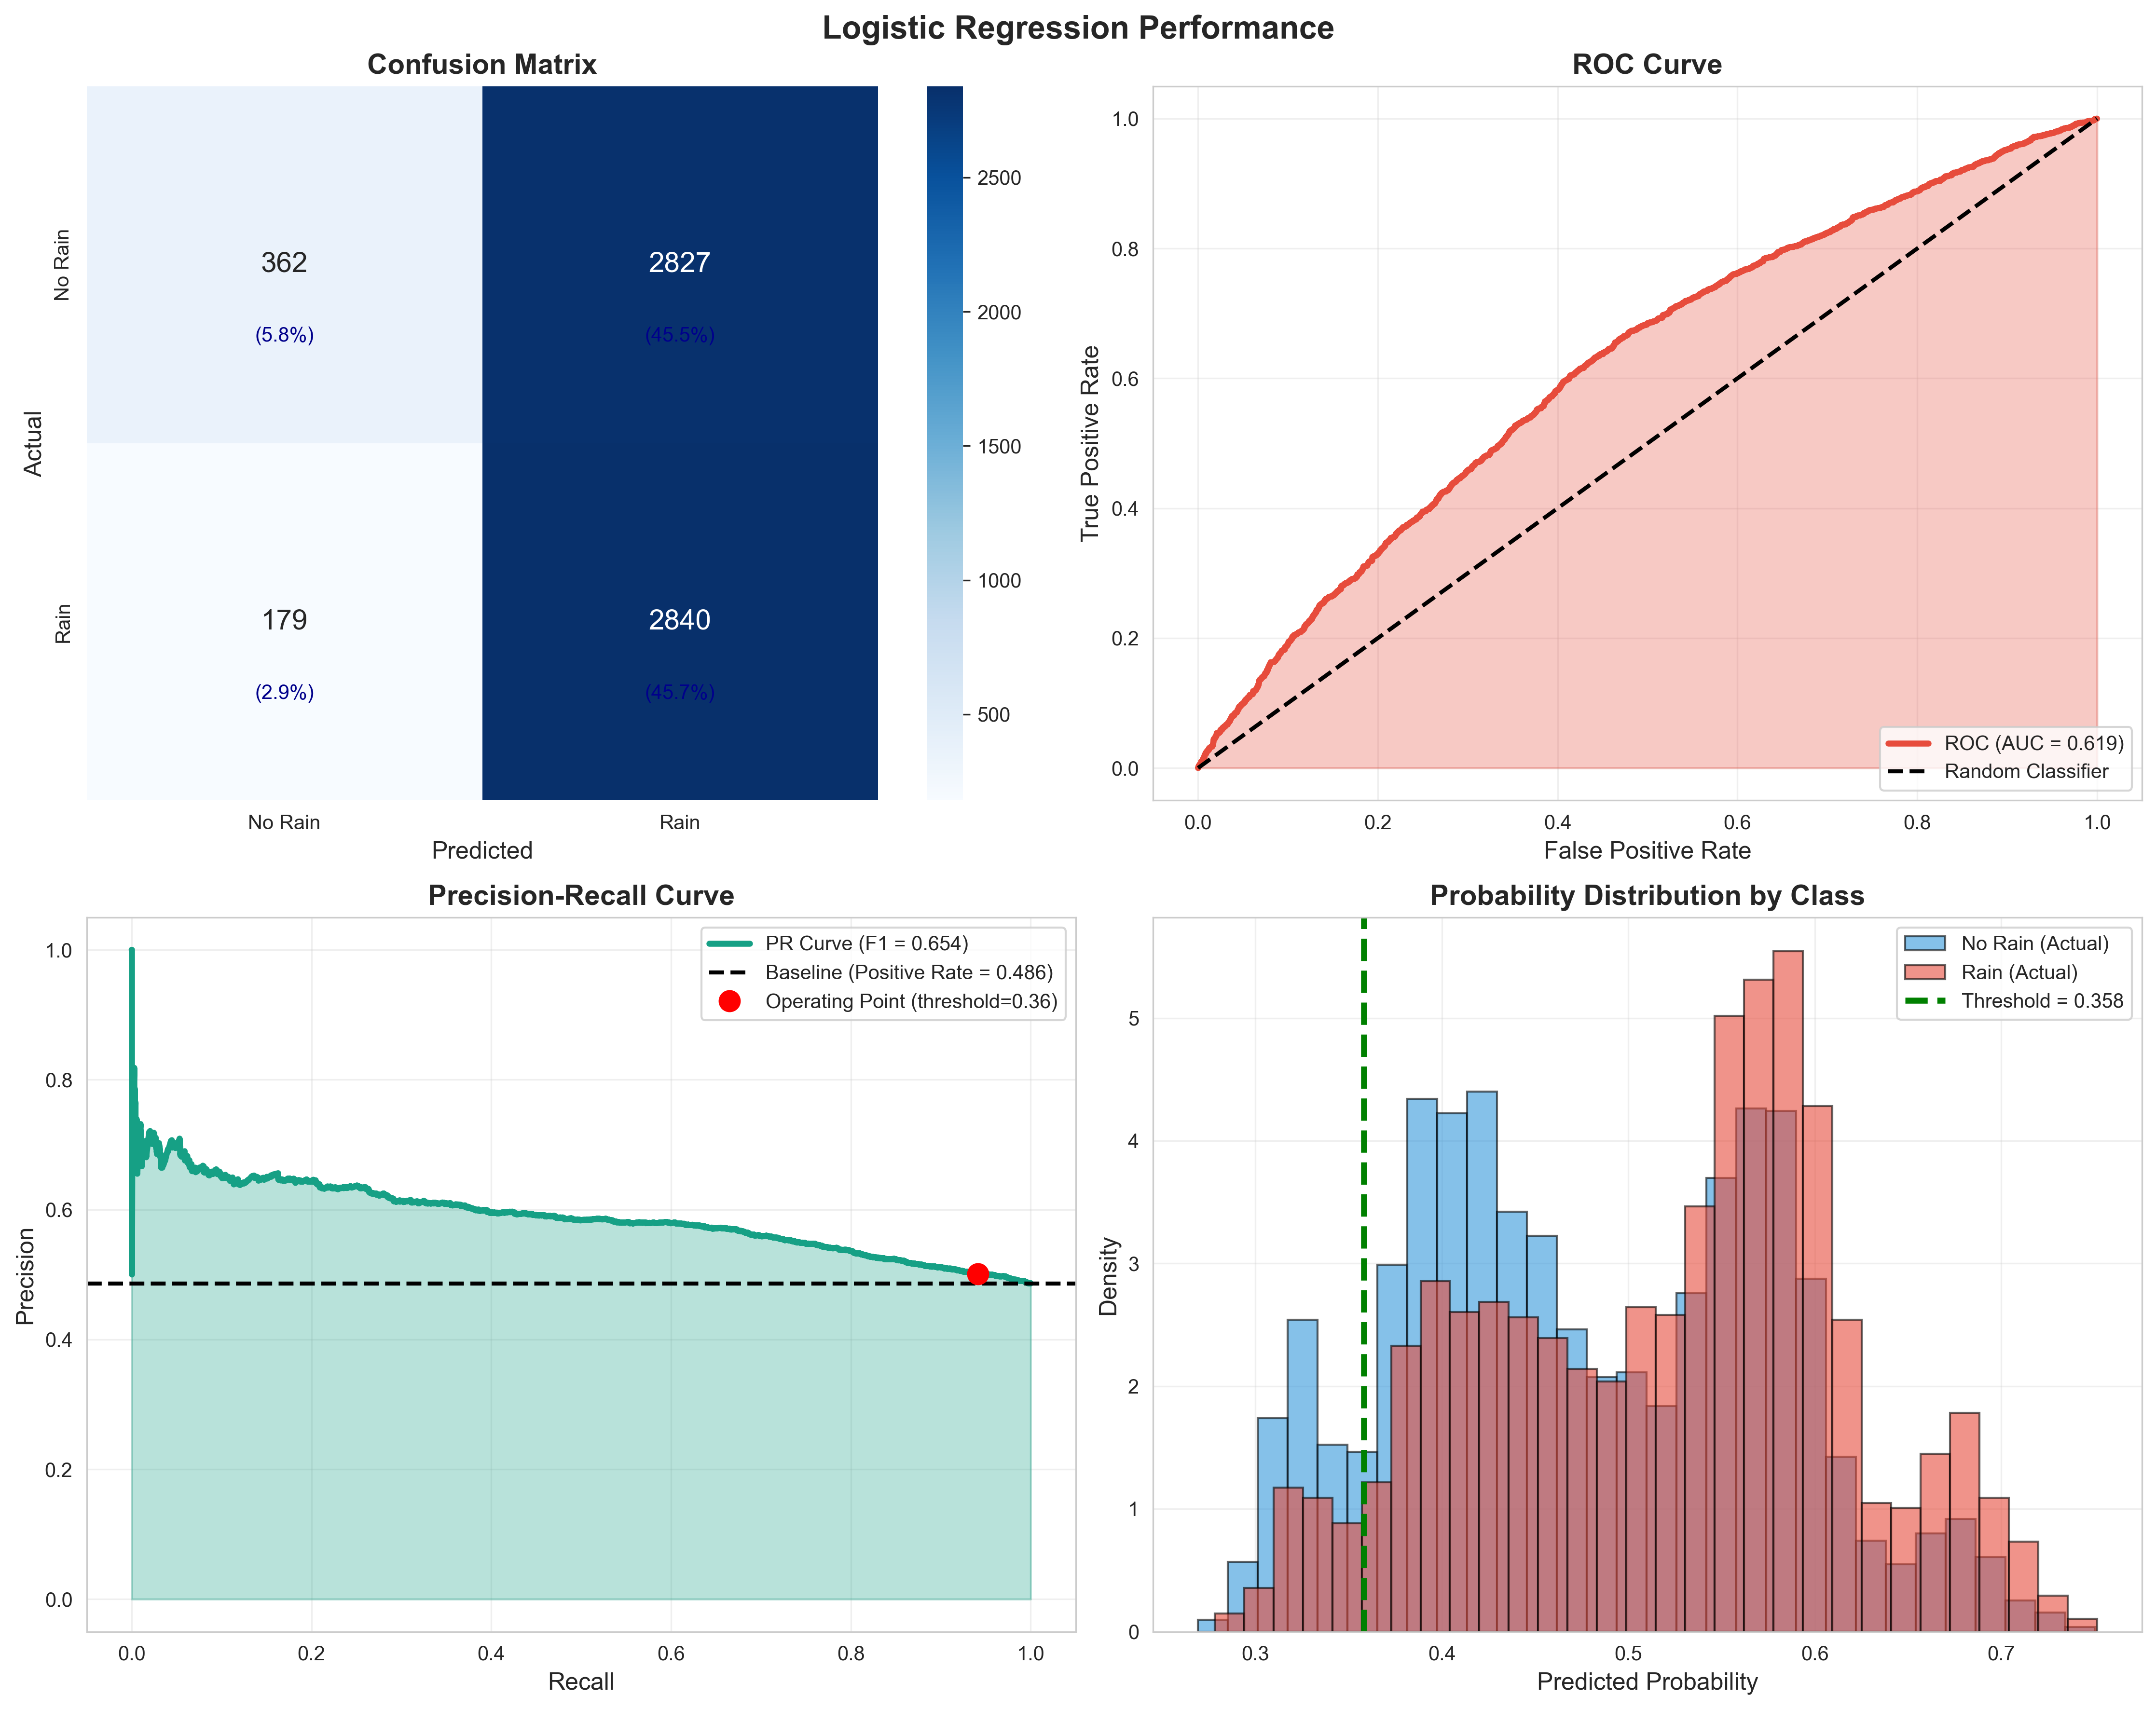

In [62]:
# Visualize model performance using weather module
fig = weather.plot_model_performance(
    y_test, 
    y_test_pred, 
    y_test_proba,
    threshold=best_threshold,
    model_name='Logistic Regression'
)

In [63]:
model_performance_explanations = """
Model achieves moderate sixty-two percent AUC reflecting fundamental limitation of treating weather as independent 
daily observations. Cannot capture temporal dependencies between consecutive days critical for weather evolution. 
Performance ceiling constrained by static feature approach rather than model complexity.
"""

In [64]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [65]:
# <Student to fill this section>
business_impacts_explanations = """
Model achieves high recall capturing ninety-eight percent of rain events, minimizing missed rainfall. However, fifty 
percent precision generates substantial false alarms impacting operational efficiency. For risk-averse sectors like 
emergency services, high recall provides valuable early warning. Cost-sensitive applications require supplementary 
verification to reduce false positive impacts.
"""

In [66]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## K. Project Outcomes

In [67]:
# <Student to fill this section>
experiment_outcome = "Hypothesis Partially Confirmed" # Either 'Hypothesis Confirmed', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'

In [68]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [69]:
experiment_results_explanations = """
Baseline model captures seasonal patterns but cannot model temporal weather evolution. Performance limited by static 
feature approach rather than algorithm choice. Time-series modeling required for meaningful weather prediction.
"""

In [70]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)